In [1]:
import os

In [2]:
import pandas as pd
import numpy as np

# Define the path to your large text file
file_path = '../traj_summary_all.txt'

In [3]:
# Manually create the list of column names from the header
# I've taken these from the header you provided. We might need to clean them up.
col_names = [
    'identifier', 'julian_date', 'utc_time', 'iau_no', 'iau_code', 'sol_lon',
    'app_lst', 'rageo', 'rageo_err', 'decgeo', 'decgeo_err', 'lamgeo', 'lamgeo_err',
    'betgeo', 'betgeo_err', 'vgeo', 'vgeo_err', 'lamhel', 'lamhel_err', 'bethel',
    'bethel_err', 'vhel', 'vhel_err', 'a', 'a_err', 'e', 'e_err', 'i', 'i_err',
    'peri', 'peri_err', 'node', 'node_err', 'pi', 'pi_err', 'b', 'b_err', 'q',
    'q_err', 'f', 'f_err', 'm', 'm_err', 'Q', 'Q_err', 'n', 'n_err', 'T', 'T_err',
    'tisserandJ', 'tisserandJ_err', 'raapp', 'raapp_err', 'decapp', 'decapp_err',
    'azim', 'azim_err', 'elev', 'elev_err', 'vinit', 'vinit_err', 'vavg', 'vavg_err',
    'lat_beg', 'lat_beg_err', 'lon_beg', 'lon_beg_err', 'ht_beg', 'ht_beg_err',
    'lat_end', 'lat_end_err', 'lon_end', 'lon_end_err', 'ht_end', 'ht_end_err',
    'duration', 'peak_abs_mag', 'peak_ht', 'F_param', 'mass_kg', 'Qc', 'median_fit_err',
    'beg_in_fov', 'end_in_fov', 'num_stat', 'participating_stations'
]

# The data starts after the '----' line. Let's count the header lines.
# Summary line, blank line, header, units, '---' line. That's 5 lines to skip.
# Let's try loading a small chunk first to test.
try:
    # --- THIS IS THE CORRECTED CODE ---
    # Use read_csv, the workhorse for delimited files.
    df = pd.read_csv(
        file_path,
        delimiter=';',          # The separator is a semicolon
        comment='#',            # Lines starting with '#' are comments
        header=None,            # No header row in the data itself
        names=col_names,        # Use our defined column names
        skipinitialspace=True,  # Handles whitespace after the delimiter
        low_memory=False,       # Better for mixed data types in large files
    )
    # --- END OF CORRECTION ---

    print("Successfully loaded the data using the correct parser!")
    print("DataFrame Info:")
    df.info()
    print("\nFirst 5 rows:")
    print(df.head())

except Exception as e:
    print(f"An error occurred: {e}")
    print("Please check the file_path. The parser settings should now be correct.")

Successfully loaded the data using the correct parser!
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055506 entries, 0 to 2055505
Data columns (total 86 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   identifier              object 
 1   julian_date             float64
 2   utc_time                object 
 3   iau_no                  int64  
 4   iau_code                object 
 5   sol_lon                 float64
 6   app_lst                 float64
 7   rageo                   float64
 8   rageo_err               float64
 9   decgeo                  float64
 10  decgeo_err              float64
 11  lamgeo                  float64
 12  lamgeo_err              float64
 13  betgeo                  float64
 14  betgeo_err              float64
 15  vgeo                    float64
 16  vgeo_err                float64
 17  lamhel                  float64
 18  lamhel_err              float64
 19  bethel                  float64
 2

In [4]:
df

,identifier,julian_date,utc_time,iau_no,iau_code,sol_lon,app_lst,rageo,rageo_err,decgeo,...,peak_abs_mag,peak_ht,F_param,mass_kg,Qc,median_fit_err,beg_in_fov,end_in_fov,num_stat,participating_stations
0,20181210010656_eBlUM,2.458463e+06,2018-12-10 01:06:56.588151,-1,...,257.653525,349.201136,321.76912,0.7213,57.70221,...,0.05,78.0939,0.828,0.000705,21.71,87.35,True,True,2,"US0002,US0008"
1,20181210012238_ucxkx,2.458463e+06,2018-12-10 01:22:38.227019,256,ORN,257.664602,353.489921,88.39023,0.7503,24.89956,...,2.16,92.6475,0.619,0.000031,15.75,95.30,True,True,2,"US0002,US0008"
2,20181210024213_c2bJq,2.458463e+06,2018-12-10 02:42:13.094461,-1,...,257.720774,12.964395,61.06752,0.4428,38.10011,...,0.58,90.0934,0.546,0.000143,30.01,71.35,True,True,2,"US0007,US0008"
3,20181210030753_Pprt1,2.458463e+06,2018-12-10 03:07:53.127669,-1,...,257.738890,19.573355,110.07317,0.6938,31.16050,...,1.87,98.0755,0.272,0.000024,27.21,99.06,True,True,2,"US0007,US0008"
4,20181210031154_NEWBS,2.458463e+06,2018-12-10 03:11:54.494374,-1,...,257.741729,20.162092,112.43493,6.8643,79.39052,...,0.55,91.4833,0.744,0.000076,9.82,77.86,True,True,2,"US0007,US0008"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055501,20250415031527_yOngA,2.460781e+06,2025-04-15 03:15:27.837494,-1,...,25.062238,258.476060,202.18505,0.2403,43.72347,...,1.78,81.1844,0.733,0.000110,68.84,56.74,True,True,3,"DE0001,NL0006,NL000N"
2055502,20250415032005_LpTLj,2.460781e+06,2025-04-15 03:20:05.408871,-1,...,25.065382,259.271098,9.99383,0.9349,55.11809,...,2.17,87.3889,0.503,0.000035,42.19,88.98,True,True,2,"NL000Q,NL0017"
2055503,20250415032020_HafDI,2.460781e+06,2025-04-15 03:20:20.593621,-1,...,25.065555,258.650369,121.53577,2.2625,71.65145,...,2.10,88.0237,0.417,0.000052,58.05,40.37,True,True,2,"NL000W,NL0017"
2055504,20250415032153_oXx8U,2.460781e+06,2025-04-15 03:21:53.425384,-1,...,25.066606,259.351871,265.43652,0.2431,39.67166,...,-0.66,98.7747,0.676,0.000059,69.97,13.60,True,True,3,"NL000A,NL000U,NL000W"


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

# --- Use the cleaned DataFrame 'df_clean' from Project 2 ---
# Or load a fresh copy if needed.
# Let's take the first meteor as our test case.
# Note: Using the original full dataframe 'df' here as we need more columns.
# We'll need to re-run the cleaning from project 2 if df is not in memory.
first_meteor_data = df.iloc[0]

In [18]:
# --- 1. Define Core Classes (Meteor class is unchanged) ---
class Meteor:
    def __init__(self, data_row):
        self.R_EARTH = 6371.0
        lat_beg_deg, lon_beg_deg, ht_beg_km = data_row['lat_beg'], data_row['lon_beg'], data_row['ht_beg']
        lat_end_deg, lon_end_deg, ht_end_km = data_row['lat_end'], data_row['lon_end'], data_row['ht_end']
        self.start_pos_xyz = self._spherical_to_cartesian(lat_beg_deg, lon_beg_deg, ht_beg_km)
        self.end_pos_xyz = self._spherical_to_cartesian(lat_end_deg, lon_end_deg, ht_end_km)
        self.mid_point_xyz = (self.start_pos_xyz + self.end_pos_xyz) / 2.0
        self.duration = data_row['duration']
        self.peak_abs_mag = data_row['peak_abs_mag']
        self.peak_ht = data_row['peak_ht']

    def _spherical_to_cartesian(self, lat_deg, lon_deg, alt_km):
        lat_rad, lon_rad = np.deg2rad(lat_deg), np.deg2rad(lon_deg)
        r = self.R_EARTH + alt_km
        x = r * np.cos(lat_rad) * np.cos(lon_rad)
        y = r * np.cos(lat_rad) * np.sin(lon_rad)
        z = r * np.sin(lat_rad)
        return np.array([x, y, z])

    def get_path_points(self, num_points=100):
        return np.linspace(self.start_pos_xyz, self.end_pos_xyz, num_points)

In [19]:
# --- VirtualCamera class is UPDATED ---
class VirtualCamera:
    def __init__(self, lat_deg, lon_deg, alt_m, fov_deg=90, img_size=(1024, 1024)):
        self.R_EARTH = 6371.0
        self.lat = np.deg2rad(lat_deg)
        self.lon = np.deg2rad(lon_deg)
        self.alt = alt_m / 1000.0
        self.fov = np.deg2rad(fov_deg)
        self.img_width, self.img_height = img_size

        r = self.R_EARTH + self.alt
        self.pos = np.array([
            r * np.cos(self.lat) * np.cos(self.lon),
            r * np.cos(self.lat) * np.sin(self.lon),
            r * np.sin(self.lat)
        ])
        
        # Define local coordinate system vectors
        self.cam_up = self.pos / np.linalg.norm(self.pos)
        self.cam_east = np.array([-np.sin(self.lon), np.cos(self.lon), 0])
        self.cam_north = np.cross(self.cam_up, self.cam_east)

    def calculate_pointing_for_target(self, target_xyz):
        """Calculates the Azimuth and Elevation needed to point at a target."""
        # Vector from camera to target
        vec_to_target = target_xyz - self.pos
        
        # Elevation is the angle between the vector and the local horizon plane.
        # It's 90 degrees minus the angle between the vector and the 'up' direction.
        angle_to_up = np.arccos(np.dot(vec_to_target, self.cam_up) / np.linalg.norm(vec_to_target))
        elevation = 90.0 - np.rad2deg(angle_to_up)

        # Azimuth is the angle of the projected vector in the horizon plane.
        # Project the target vector onto the local horizon plane
        proj_on_plane = vec_to_target - np.dot(vec_to_target, self.cam_up) * self.cam_up
        
        # Angle with North gives Azimuth
        # We use atan2 for a full 360-degree angle
        azimuth = np.rad2deg(np.arctan2(
            np.dot(proj_on_plane, self.cam_east),
            np.dot(proj_on_plane, self.cam_north)
        ))
        
        # Ensure Azimuth is in [0, 360) range
        if azimuth < 0:
            azimuth += 360
            
        return azimuth, elevation

    def project_to_pixel(self, world_points_xyz, pointing_az_deg, pointing_el_deg):
        # Create rotation matrix from Azimuth/Elevation
        az_rad = np.deg2rad(pointing_az_deg)
        el_rad = np.deg2rad(pointing_el_deg)
        
        rot_az = R.from_rotvec(az_rad * -self.cam_up) # Azimuth rotation is around the Z-axis (up)
        cam_north_rotated = rot_az.apply(self.cam_north)
        
        rot_el_axis = np.cross(cam_north_rotated, self.cam_up)
        rot_el = R.from_rotvec(el_rad * rot_el_axis)
        
        cam_forward = rot_el.apply(cam_north_rotated)
        cam_right = np.cross(cam_forward, self.cam_up) # Re-calculate right vector
        
        # Create the View Matrix
        view_matrix = np.array([
            cam_right,
            self.cam_up,
            -cam_forward
        ])

        points_relative_to_cam = world_points_xyz - self.pos
        points_in_cam_space = np.dot(points_relative_to_cam, view_matrix.T)

        # Perspective Projection
        in_front_of_camera = points_in_cam_space[:, 2] < 0
        if not np.any(in_front_of_camera): return None
        
        points_in_cam_space = points_in_cam_space[in_front_of_camera]
        x_cam, y_cam, z_cam = points_in_cam_space[:, 0], points_in_cam_space[:, 1], points_in_cam_space[:, 2]
        
        f = 1.0 / np.tan(self.fov / 2.0)
        x_proj = f * (x_cam / -z_cam)
        y_proj = f * (y_cam / -z_cam)
        
        # Convert to Pixel Coordinates
        pixel_x = (x_proj + 1) * 0.5 * self.img_width
        pixel_y = (1 - (y_proj + 1) * 0.5) * self.img_height
        
        return np.vstack((pixel_x, pixel_y)).T

In [20]:
# --- Main Execution ---

# 1. Create meteor and camera objects
meteor = Meteor(first_meteor_data)
cam_lat, cam_lon, cam_alt = 35.5, -106.5, 2000
camera = VirtualCamera(lat_deg=cam_lat, lon_deg=cam_lon, alt_m=cam_alt)

In [21]:
# 2. AUTO-AIM the camera at the meteor's midpoint
pointing_az, pointing_el = camera.calculate_pointing_for_target(meteor.mid_point_xyz)
print(f"Auto-aiming camera to Azimuth: {pointing_az:.2f}, Elevation: {pointing_el:.2f}")

Auto-aiming camera to Azimuth: 158.21, Elevation: 50.41


In [22]:
# 3. Project the meteor path using the new pointing
meteor_path_points = meteor.get_path_points()
pixel_coords = camera.project_to_pixel(meteor_path_points, pointing_az, pointing_el)

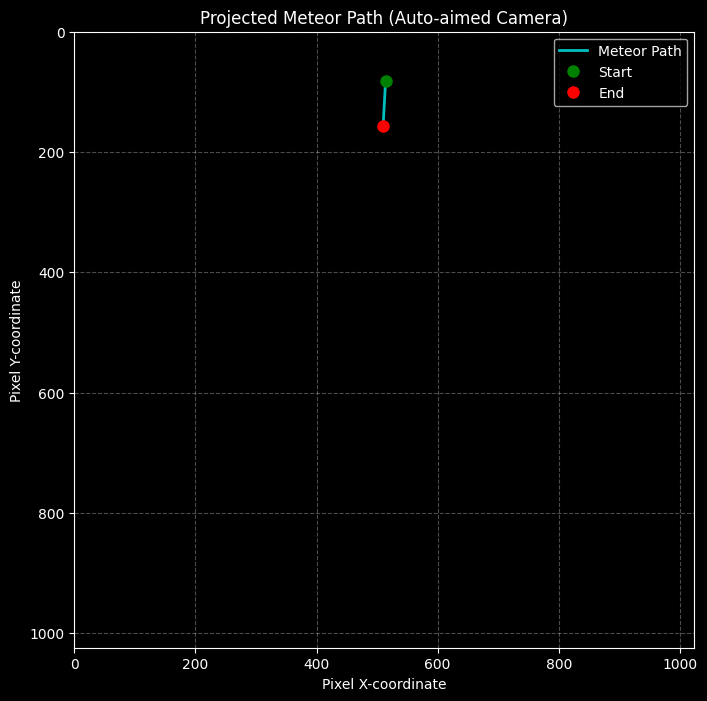

In [23]:
# 4. Visualize the Result
if pixel_coords is not None:
    plt.figure(figsize=(8, 8))
    plt.style.use('dark_background')
    plt.plot(pixel_coords[:, 0], pixel_coords[:, 1], 'c-', linewidth=2, label="Meteor Path")
    # Mark start and end points
    plt.plot(pixel_coords[0, 0], pixel_coords[0, 1], 'go', markersize=8, label="Start")
    plt.plot(pixel_coords[-1, 0], pixel_coords[-1, 1], 'ro', markersize=8, label="End")
    
    plt.xlim(0, camera.img_width)
    plt.ylim(0, camera.img_height)
    plt.gca().invert_yaxis()
    plt.title("Projected Meteor Path (Auto-aimed Camera)")
    plt.xlabel("Pixel X-coordinate")
    plt.ylabel("Pixel Y-coordinate")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.show()
else:
    print("Meteor is still not visible. This might indicate a geometry issue or the meteor is below the horizon.")

# Phase 2: From Static Plot to Dynamic Video


In [24]:
import numpy as np
import cv2 # OpenCV for video writing and drawing
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

In [108]:
# --- Classes from before (Meteor, VirtualCamera) are kept as they were ---
# (Including them here for a complete, runnable script)
class Meteor:
    def __init__(self, data_row):
        self.R_EARTH = 6371.0
        lat_beg_deg, lon_beg_deg, ht_beg_km = data_row['lat_beg'], data_row['lon_beg'], data_row['ht_beg']
        lat_end_deg, lon_end_deg, ht_end_km = data_row['lat_end'], data_row['lon_end'], data_row['ht_end']
        self.start_pos_xyz = self._spherical_to_cartesian(lat_beg_deg, lon_beg_deg, ht_beg_km)
        self.end_pos_xyz = self._spherical_to_cartesian(lat_end_deg, lon_end_deg, ht_end_km)
        self.mid_point_xyz = (self.start_pos_xyz + self.end_pos_xyz) / 2.0
        self.duration = data_row['duration']
        self.peak_abs_mag = data_row['peak_abs_mag']
        self.peak_ht = data_row['peak_ht']
        self.path_vector = self.end_pos_xyz - self.start_pos_xyz
        self.total_path_length = np.linalg.norm(self.path_vector)

    def _spherical_to_cartesian(self, lat_deg, lon_deg, alt_km):
        lat_rad, lon_rad = np.deg2rad(lat_deg), np.deg2rad(lon_deg)
        r = self.R_EARTH + alt_km
        x = r * np.cos(lat_rad) * np.cos(lon_rad)
        y = r * np.cos(lat_rad) * np.sin(lon_rad)
        z = r * np.sin(lat_rad)
        return np.array([x, y, z])

    def get_position_at_time(self, t):
        # t is from 0.0 to 1.0 (percentage of duration)
        return self.start_pos_xyz + t * self.path_vector

class VirtualCamera:
    # (This class is unchanged from the previous working version)
    def __init__(self, lat_deg, lon_deg, alt_m, fov_deg=90, img_size=(1024, 1024)):
        self.R_EARTH = 6371.0; self.lat = np.deg2rad(lat_deg); self.lon = np.deg2rad(lon_deg)
        self.alt = alt_m / 1000.0; self.fov = np.deg2rad(fov_deg); self.img_width, self.img_height = img_size
        r = self.R_EARTH + self.alt
        self.pos = np.array([r * np.cos(self.lat) * np.cos(self.lon), r * np.cos(self.lat) * np.sin(self.lon), r * np.sin(self.lat)])
        self.cam_up = self.pos / np.linalg.norm(self.pos); self.cam_east = np.array([-np.sin(self.lon), np.cos(self.lon), 0])
        self.cam_north = np.cross(self.cam_up, self.cam_east)
    def calculate_pointing_for_target(self, target_xyz):
        vec_to_target = target_xyz - self.pos
        elevation = 90.0 - np.rad2deg(np.arccos(np.dot(vec_to_target, self.cam_up) / np.linalg.norm(vec_to_target)))
        proj_on_plane = vec_to_target - np.dot(vec_to_target, self.cam_up) * self.cam_up
        azimuth = np.rad2deg(np.arctan2(np.dot(proj_on_plane, self.cam_east), np.dot(proj_on_plane, self.cam_north)))
        return azimuth if azimuth >= 0 else azimuth + 360, elevation
    def project_to_pixel(self, world_points_xyz, pointing_az_deg, pointing_el_deg):
        az_rad, el_rad = np.deg2rad(pointing_az_deg), np.deg2rad(pointing_el_deg)
        rot_az = R.from_rotvec(az_rad * -self.cam_up); cam_north_rotated = rot_az.apply(self.cam_north)
        rot_el_axis = np.cross(cam_north_rotated, self.cam_up); rot_el = R.from_rotvec(el_rad * rot_el_axis)
        cam_forward = rot_el.apply(cam_north_rotated); cam_right = np.cross(cam_forward, self.cam_up)
        view_matrix = np.array([cam_right, self.cam_up, -cam_forward])
        points_relative_to_cam = world_points_xyz - self.pos
        points_in_cam_space = np.dot(points_relative_to_cam, view_matrix.T)
        in_front = points_in_cam_space[:, 2] < 0
        if not np.any(in_front): return None
        points_in_cam_space = points_in_cam_space[in_front]
        x_cam, y_cam, z_cam = points_in_cam_space[:, 0], points_in_cam_space[:, 1], points_in_cam_space[:, 2]
        f = 1.0 / np.tan(self.fov / 2.0)
        x_proj, y_proj = f * (x_cam / -z_cam), f * (y_cam / -z_cam)
        pixel_x = (x_proj + 1) * 0.5 * self.img_width; pixel_y = (1 - (y_proj + 1) * 0.5) * self.img_height
        return np.vstack((pixel_x, pixel_y)).T
# --- NEW VideoRenderer Class ---
class VideoRenderer:
    def __init__(self, width, height, fps=25):
        self.width = width
        self.height = height
        self.fps = fps
        self.frames = []

    def create_light_curve(self, num_frames, peak_frame, peak_mag):
        """Generates a brightness profile (light curve)."""
        # Simple asymmetric Gaussian light curve
        time_points = np.arange(num_frames)
        # Use a simple magnitude to brightness conversion (lower mag = brighter)
        # Max brightness is 255 (white). We'll scale it.
        max_brightness = 255
        
        # A simple curve: linear ramp up, linear ramp down
        brightness = np.zeros(num_frames)
        if peak_frame > 0:
            brightness[:peak_frame] = np.linspace(50, max_brightness, peak_frame)
        if num_frames - peak_frame > 0:
            brightness[peak_frame:] = np.linspace(max_brightness, 50, num_frames - peak_frame)
        
        return brightness.astype(int)

    def render(self, meteor, camera, pointing_az, pointing_el):
        """Renders the full video sequence."""
        num_frames = int(meteor.duration * self.fps)
        if num_frames < 2: num_frames = 2 # Ensure at least 2 frames for a line

        # Simplified: peak is in the middle of the video
        peak_frame = num_frames // 2
        
        light_curve = self.create_light_curve(num_frames, peak_frame, meteor.peak_abs_mag)
        
        # Get the pixel coordinates for the entire path
        path_3d_points = np.array([meteor.get_position_at_time(t) for t in np.linspace(0, 1, num_frames)])
        path_pixel_coords = camera.project_to_pixel(path_3d_points, pointing_az, pointing_el)
        
        if path_pixel_coords is None:
            print("Meteor path is not renderable.")
            return

        for i in range(1, len(path_pixel_coords)):
            # Create a new black frame for each step
            frame = np.zeros((self.height, self.width, 3), dtype=np.uint8)
            
            # Draw the meteor streak segment by segment
            # The "head" of the meteor is at path_pixel_coords[i]
            p1 = (int(path_pixel_coords[i-1][0]), int(path_pixel_coords[i-1][1]))
            p2 = (int(path_pixel_coords[i][0]), int(path_pixel_coords[i][1]))
            
            # The brightness comes from our light curve
            brightness = int(light_curve[i])
            color = (brightness, brightness, brightness) # Grayscale
            
            # Draw the line with a glow effect (by drawing multiple blurred lines)
            cv2.line(frame, p1, p2, color, thickness=3, lineType=cv2.LINE_AA)
            blurred_frame = cv2.GaussianBlur(frame, (5,5), 0) # Apply blur
            
            # We want the trail to persist, so add this frame to previous frames
            if len(self.frames) > 0:
                # Add the new blurred segment to the last frame
                new_frame = cv2.add(self.frames[-1], blurred_frame)
            else:
                new_frame = blurred_frame

            self.frames.append(new_frame)
            
    def save_video(self, filename="meteor_output.mp4"):
        if not self.frames:
            print("No frames to save.")
            return
            
        # Define the codec and create VideoWriter object
        fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Or 'XVID' for .avi
        out = cv2.VideoWriter(filename, fourcc, self.fps, (self.width, self.height))

        for frame in self.frames:
            out.write(frame)

        out.release()
        print(f"Video saved successfully as {filename}")

In [30]:
# --- Main Execution ---

# 1. Get data for one meteor
first_meteor_data = df.iloc[0]
meteor = Meteor(first_meteor_data)

In [31]:
# 2. Setup camera and renderer
cam_lat, cam_lon, cam_alt = 35.5, -106.5, 2000
camera = VirtualCamera(lat_deg=cam_lat, lon_deg=cam_lon, alt_m=cam_alt)
renderer = VideoRenderer(width=camera.img_width, height=camera.img_height)

In [32]:
# 3. Auto-aim and render
pointing_az, pointing_el = camera.calculate_pointing_for_target(meteor.mid_point_xyz)
renderer.render(meteor, camera, pointing_az, pointing_el)

In [33]:
# 4. Save the final video
renderer.save_video()

Video saved successfully as meteor_output.mp4


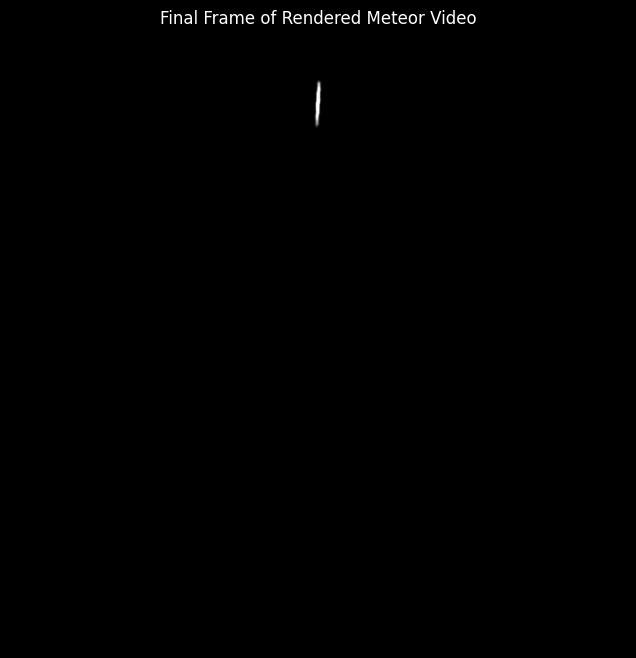

In [34]:
# Optional: Display the last frame to see the full streak
if renderer.frames:
    last_frame = renderer.frames[-1]
    # OpenCV uses BGR, Matplotlib uses RGB. Convert for display.
    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB))
    plt.title("Final Frame of Rendered Meteor Video")
    plt.axis('off')
    plt.show()

# Phase 3: Adding Realism - The Starfield


In [221]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [222]:
# --- FINALIZED AND CORRECTED SCRIPT ---

# This class is now a simple data container.
class MeteorData:
    def __init__(self, data_row):
        # We only need the parameters that drive the 2D animation
        self.duration = data_row['duration'] if data_row['duration'] > 0.1 else 1.0
        self.azimuth = data_row['azim']
        self.elevation = data_row['elev']
        self.identifier = data_row['identifier']

In [223]:
# A simple class to create a random star background.
class Starfield:
    def create_random_starfield(self, width, height, num_stars=500):
        star_bg = np.zeros((height, width, 3), dtype=np.uint8)
        for _ in range(num_stars):
            x, y = np.random.randint(0, width), np.random.randint(0, height)
            brightness = np.random.randint(70, 200)
            size = np.random.randint(1, 3)
            cv2.circle(star_bg, (x, y), size, (brightness, brightness, brightness), -1, cv2.LINE_AA)
        return cv2.GaussianBlur(star_bg, (3,3), 0)

In [224]:
# The final, robust video renderer.
class VideoRenderer:
    def __init__(self, width, height, fps=25):
        self.width, self.height, self.fps = width, height, fps
        self.frames = []

    def render(self, path_pixel_coords, duration, star_bg):
        num_frames = int(duration * self.fps)
        if num_frames < 2: num_frames = 2

        brightness_curve = np.zeros(num_frames)
        max_brightness = 255
        peak_frame = num_frames // 2
        if peak_frame > 0: brightness_curve[:peak_frame] = np.linspace(50, max_brightness, peak_frame)
        if num_frames - peak_frame > 0: brightness_curve[peak_frame:] = np.linspace(max_brightness, 50, num_frames - peak_frame)
        
        persistent_trail = star_bg.copy()
        
        for i in range(1, len(path_pixel_coords)):
            p1 = tuple(path_pixel_coords[i-1].astype(int))
            p2 = tuple(path_pixel_coords[i].astype(int))
            brightness = int(brightness_curve[i])
            color = (brightness, brightness, brightness)
            
            segment_canvas = np.zeros_like(persistent_trail)
            cv2.line(segment_canvas, p1, p2, color, 3, cv2.LINE_AA)
            segment_glow = cv2.GaussianBlur(segment_canvas, (9,9), 0)
            
            persistent_trail = cv2.add(persistent_trail, segment_glow)
            self.frames.append(persistent_trail.copy())

    def save_video(self, filename="meteor_output.mp4"):
        if not self.frames:
            print("No frames were rendered.")
            return
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(filename, fourcc, self.fps, (self.width, self.height))
        for frame in self.frames:
            out.write(frame)
        out.release()
        print(f"Video saved successfully as {filename}")

In [225]:
# --- NEW Data-Driven Path Generator ---
def generate_data_driven_2d_path(meteor_data, width, height):
    """Uses meteor data to generate a plausible and varied 2D path."""
    # 1. Angle is determined by Azimuth
    # Azimuth: 0=N, 90=E, 180=S, 270=W. In image space, this corresponds to up, right, down, left.
    angle_rad = np.deg2rad(meteor_data.azimuth)
    direction_vector = np.array([np.sin(angle_rad), -np.cos(angle_rad)]) # Y is inverted

    # 2. Length is determined by duration and elevation
    # Low elevation (near horizon) = long streak. High elevation (overhead) = short streak.
    base_length = 400 # A base pixel length
    elevation_scaling = np.cos(np.deg2rad(meteor_data.elevation))
    duration_scaling = min(meteor_data.duration, 2.0) / 2.0 # Scale duration, cap at 2s
    streak_length = base_length * elevation_scaling * (0.5 + duration_scaling)
    
    # 3. Position is randomized around the center
    center_x = width / 2 + np.random.uniform(-150, 150)
    center_y = height / 2 + np.random.uniform(-150, 150)
    center_point = np.array([center_x, center_y])
    
    # 4. Calculate start and end points
    start_point = center_point - 0.5 * streak_length * direction_vector
    end_point = center_point + 0.5 * streak_length * direction_vector
    
    # 5. Create all the points along the path
    num_points = int(meteor_data.duration * 25) # 25 FPS
    if num_points < 2: num_points = 2
    x_coords = np.linspace(start_point[0], end_point[0], num_points)
    y_coords = np.linspace(start_point[1], end_point[1], num_points)
    
    return np.vstack([x_coords, y_coords]).T

In [226]:
# --- Main Execution ---

# Setup basic parameters
WIDTH, HEIGHT = 1024, 1024

# Instantiate our simple classes
starfield_generator = Starfield()
renderer = VideoRenderer(width=WIDTH, height=HEIGHT)

# Generate a static background
star_bg = starfield_generator.create_random_starfield(WIDTH, HEIGHT)

In [232]:
# --- Process a single meteor ---
# Ensure your 'df' DataFrame is loaded from the original data file
# You can change the index (e.g., df.iloc[1], df.iloc[2]) to see different meteors
data_row = df.iloc[0] # Let's try the SECOND meteor this time

meteor = MeteorData(data_row)


In [233]:
# Generate the unique 2D path for this meteor
path_coords = generate_data_driven_2d_path(meteor, WIDTH, HEIGHT)

# Render the animation
renderer.render(path_coords, meteor.duration, star_bg)


In [234]:
# Save the video with a unique name
video_filename = f"meteor_synth_{meteor.identifier}.mp4"
renderer.save_video(filename=video_filename)

Video saved successfully as meteor_synth_20181210010656_eBlUM.mp4


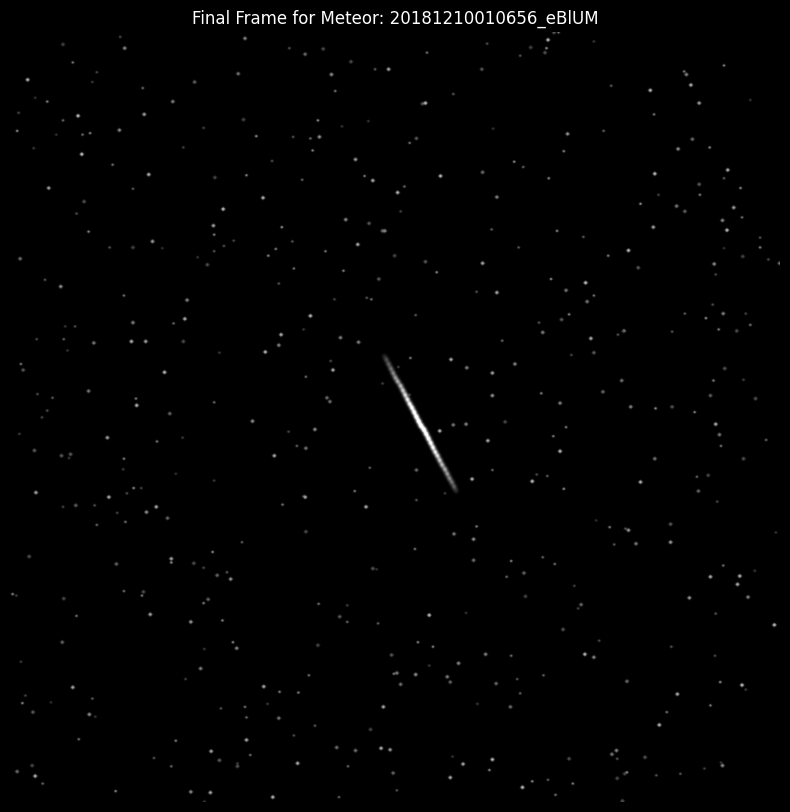

In [235]:
# Display the final result
if renderer.frames:
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(renderer.frames[-1], cv2.COLOR_BGR2RGB))
    plt.title(f"Final Frame for Meteor: {meteor.identifier}"); plt.axis('off'); plt.show()

# Phase 4: Create the Dataset

In [283]:
import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm

In [284]:
# --- Create output directories if they don't exist ---
if not os.path.exists('output_videos'):
    os.makedirs('output_videos')
if not os.path.exists('ground_truth'):
    os.makedirs('ground_truth')

In [285]:
# --- All classes are the same as the final correct version ---
class MeteorData:
    def __init__(self, data_row):
        self.duration = data_row['duration'] if data_row['duration'] > 0.1 else 1.0
        self.azimuth = data_row['azim']
        self.elevation = data_row['elev']
        self.identifier = "".join(c for c in data_row['identifier'] if c.isalnum())
        self.iau_code = data_row['iau_code'].strip()

In [286]:
class Starfield:
    def create_random_starfield(self, width, height, num_stars=500):
        star_bg = np.zeros((height, width, 3), dtype=np.uint8)
        for _ in range(num_stars):
            x, y = np.random.randint(0, width), np.random.randint(0, height)
            brightness = np.random.randint(70, 200)
            size = np.random.randint(1, 3)
            cv2.circle(star_bg, (x, y), size, (brightness, brightness, brightness), -1, cv2.LINE_AA)
        return cv2.GaussianBlur(star_bg, (3,3), 0)

In [287]:
class VideoRenderer:
    def __init__(self, width, height, fps=25):
        self.width, self.height, self.fps = width, height, fps
    def render(self, path_pixel_coords, duration, star_bg):
        frames = []
        num_frames = int(duration * self.fps);
        if num_frames < 2: num_frames = 2
        brightness_curve = np.zeros(num_frames); max_brightness=255; peak_frame=num_frames//2
        if peak_frame > 0: brightness_curve[:peak_frame] = np.linspace(50, max_brightness, peak_frame)
        if num_frames-peak_frame > 0: brightness_curve[peak_frame:] = np.linspace(max_brightness, 50, num_frames-peak_frame)
        persistent_trail = star_bg.copy()
        for i in range(1, len(path_pixel_coords)):
            p1, p2 = tuple(path_pixel_coords[i-1].astype(int)), tuple(path_pixel_coords[i].astype(int))
            brightness = int(brightness_curve[i]); color = (brightness, brightness, brightness)
            segment_canvas = np.zeros_like(persistent_trail)
            cv2.line(segment_canvas, p1, p2, color, 3, cv2.LINE_AA)
            segment_glow = cv2.GaussianBlur(segment_canvas, (9,9), 0)
            persistent_trail = cv2.add(persistent_trail, segment_glow)
            frames.append(persistent_trail.copy())
        return frames

In [288]:
def generate_data_driven_2d_path(meteor_data, width, height):
    angle_rad = np.deg2rad(meteor_data.azimuth); direction_vector = np.array([np.sin(angle_rad), -np.cos(angle_rad)])
    base_length = 400; elevation_scaling = np.cos(np.deg2rad(meteor_data.elevation))
    duration_scaling = min(meteor_data.duration, 2.0) / 2.0
    streak_length = base_length * elevation_scaling * (0.5 + duration_scaling)
    # This is the safety check that was causing the crash
    if streak_length < 10: return None, None
    center_x = width / 2 + np.random.uniform(-150, 150); center_y = height / 2 + np.random.uniform(-150, 150)
    center_point = np.array([center_x, center_y])
    start_point = center_point - 0.5 * streak_length * direction_vector; end_point = center_point + 0.5 * streak_length * direction_vector
    num_points = int(meteor_data.duration * 25);
    if num_points < 2: num_points = 2
    x_coords = np.linspace(start_point[0], end_point[0], num_points); y_coords = np.linspace(start_point[1], end_point[1], num_points)
    path_pixel_coords = np.vstack([x_coords, y_coords]).T
    return path_pixel_coords, (start_point, end_point)

In [289]:
def save_video(frames, filename, fps, width, height):
    if not frames: return
    fourcc = cv2.VideoWriter_fourcc(*'mp4v');
    out = cv2.VideoWriter(filename, fourcc, fps, (width, height))
    for frame in frames: out.write(frame)
    out.release()

In [290]:
# --- YOUR SUPERIOR STRATEGY: Create a Natural Curated Subset ---
df['iau_code'] = df['iau_code'].str.strip().replace('...', 'Sporadic')

In [291]:
all_showers = df.groupby('iau_code')
curated_samples_list = []
for shower_code, group in all_showers:
    if shower_code == 'Sporadic': samples = group.sample(n=10000, random_state=42)
    elif len(group) > 1000: samples = group.sample(n=1000, random_state=42)
    else: samples = group
    curated_samples_list.append(samples)
df_for_generation = pd.concat(curated_samples_list).sample(frac=1, random_state=42).reset_index(drop=True)
print(f"Created a curated dataset for generation with {len(df_for_generation)} unique videos.")

Created a curated dataset for generation with 186445 unique videos.


In [292]:
# --- Main Execution Loop ---
WIDTH, HEIGHT, FPS = 1024, 1024, 25
starfield_generator = Starfield()
renderer = VideoRenderer(width=WIDTH, height=HEIGHT, fps=FPS)

In [293]:
ground_truth_data = []

# Using tqdm for a progress bar
for index, data_row in tqdm(df_for_generation.iterrows(), total=len(df_for_generation)):
    
    meteor = MeteorData(data_row)
    
    # --- THIS IS THE FIX ---
    # 1. Call the function and get the result
    path_data = generate_data_driven_2d_path(meteor, WIDTH, HEIGHT)
    
    # 2. Check if the result is valid BEFORE unpacking
    if path_data[0] is None:
        # This will gracefully skip the un-renderable meteors
        continue
    
    # 3. If it's valid, unpack it and proceed
    path_coords, (start_pt, end_pt) = path_data
    # --- END OF FIX ---
    
    star_bg = starfield_generator.create_random_starfield(WIDTH, HEIGHT)
    frames = renderer.render(path_coords, meteor.duration, star_bg)
    video_filename = os.path.join('output_videos', f"{meteor.iau_code}_{meteor.identifier}.mp4")
    save_video(frames, video_filename, FPS, WIDTH, HEIGHT)
    
    ground_truth_data.append({
        'video_file': os.path.basename(video_filename), 'iau_code': meteor.iau_code,
        'start_x': start_pt[0], 'start_y': start_pt[1], 'end_x': end_pt[0], 'end_y': end_pt[1]
    })


100%|██████████| 186445/186445 [7:45:20<00:00,  6.68it/s]   


In [294]:
# Save the ground truth data
gt_df = pd.DataFrame(ground_truth_data)
gt_df.to_csv('ground_truth/dataset_labels.csv', index=False)

print("\nCurated dataset generation complete.")
print(f"Ground truth labels saved to 'ground_truth/dataset_labels.csv'")


Curated dataset generation complete.
Ground truth labels saved to 'ground_truth/dataset_labels.csv'
